In [71]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [72]:
# dataset
customer_churn=pd.read_csv('customer_churn.csv')
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [74]:
# describe
customer_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [75]:
# Assuming you have a DataFrame named 'df'
customer_5 = customer_churn.iloc[:, 4]      # all row , 4 index
customer_5

,Dependents
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,Yes
7041,No


In [76]:
customer_15=customer_churn.iloc[:,14]
customer_15

,StreamingMovies
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,No
7041,No


In [77]:
customer_churn.head(1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


# Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’


In [78]:
senior_male_electronic=customer_churn[(customer_churn['gender']=='Male') &(customer_churn['SeniorCitizen']==1)&(customer_churn['PaymentMethod']=='Electronic Check')].shape[0]
senior_male_electronic

0

In [79]:
customer_total_tenure=customer_churn[(customer_churn['tenure']>70) |(customer_churn['MonthlyCharges']>100)].shape[0]
customer_total_tenure

1259

In [80]:
customer_churn['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


**Extract all the customers whose contract is of two years, payment method
is mailed check and the value of churn is ‘Yes’ and store the result in
‘two_mail_yes’**

In [81]:
two_mail_yes=customer_churn[(customer_churn['Contract']=='Two year')&(customer_churn['PaymentMethod']=='Mailed check')&(customer_churn['Churn']=='Yes')].shape[0]
two_mail_yes

3

**Extract 333 random records from the customer_churndataframe and store
the result in ‘customer_333’**

In [82]:
customer_333=customer_churn.sample(n=333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6040,0519-XUZJU,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Mailed check,70.75,70.75,Yes
3864,4817-VYYWS,Female,0,No,No,30,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.20,2983.8,Yes
2017,1087-GRUYI,Male,0,Yes,No,38,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.40,743.5,No
6296,4023-RTIQM,Female,1,Yes,No,31,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,One year,Yes,Credit card (automatic),50.40,1580.1,No
2460,2230-XTUWL,Female,0,Yes,Yes,48,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.55,883.35,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,1452-VOQCH,Male,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,75.10,75.1,No
6756,1754-GKYPY,Male,1,Yes,No,22,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),89.75,1938.9,No
3845,0004-TLHLJ,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,Yes
5909,5343-SGUBI,Female,0,No,No,52,Yes,Yes,Fiber optic,No,...,No,No,No,No,One year,Yes,Mailed check,80.20,4297.6,No


In [83]:
customer_churn['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


# Data Visualization

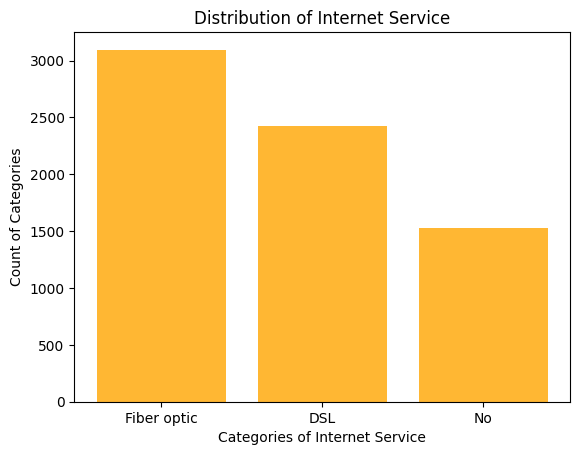

In [84]:
# Calculate the count of each category in 'InternetService'
service_counts = customer_churn['InternetService'].value_counts()

# Plot the bar chart
plt.bar(service_counts.index, service_counts.values, color='orange',alpha=0.8)

# Add labels and title
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')

# Show the plot
plt.show()

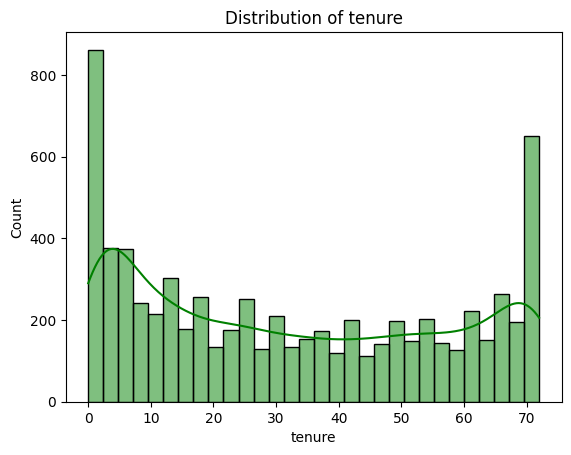

In [85]:
# histogram
sns.histplot(customer_churn['tenure'],bins=30,color='g',kde=True)
plt.xlabel('tenure')
plt.ylabel('Count')
plt.title('Distribution of tenure')
plt.show()

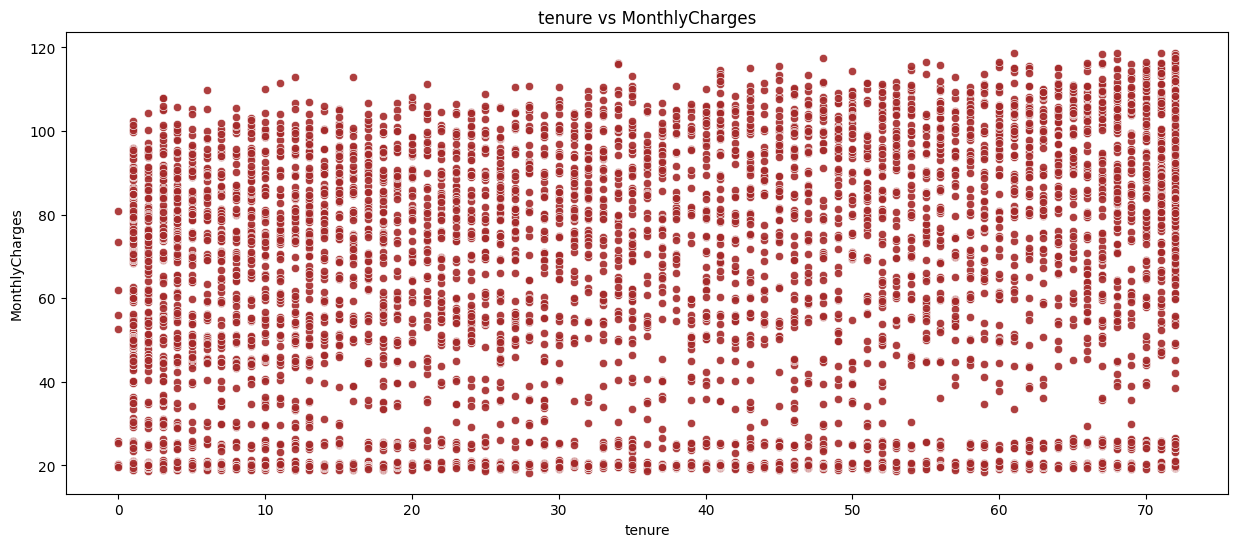

In [86]:
# scaterplot
plt.figure(figsize=(15,6))
sns.scatterplot(x=customer_churn['tenure'],y=customer_churn['MonthlyCharges'],color='brown',alpha=0.9)
plt.xlabel('tenure')
plt.ylabel('MonthlyCharges')
plt.title('tenure vs MonthlyCharges')
plt.show()

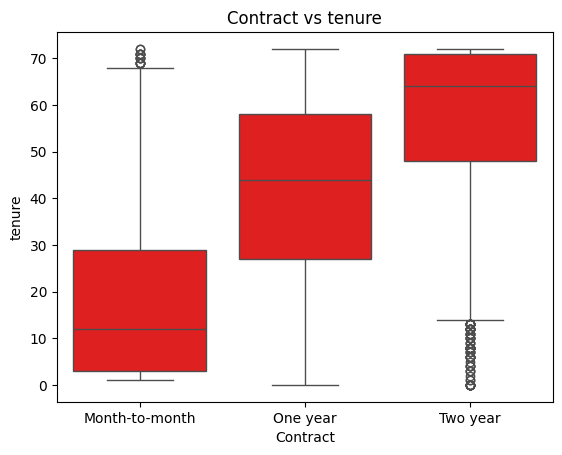

In [87]:
# boxplot
sns.boxplot(x=customer_churn['Contract'],y=customer_churn['tenure'],color='r')
plt.xlabel('Contract')
plt.ylabel('tenure')
plt.title('Contract vs tenure')
plt.show()

In [88]:
# independent , dependent
train=customer_churn['tenure']
test=customer_churn['MonthlyCharges']

In [89]:
# train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.3,random_state=42)

In [90]:
# linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train.values.reshape(-1,1),y_train)

LinearRegression()

In [91]:
# predict
y_pred=lr.predict(x_test.values.reshape(-1,1))

In [92]:
y_pred

array([55.10659011, 67.43520921, 70.82557946, ..., 73.29130328,
       60.96268418, 61.57911514])

In [93]:
# root mean square error
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

29.07936015646814

In [94]:
# error in prediction
error=y_test-y_pred
error

,MonthlyCharges
185,-30.306590
2715,-42.185209
3825,-51.475579
1807,21.243410
132,-24.898812
...,...
5522,15.043410
6377,-10.456590
5500,-12.791303
2392,29.737316


In [95]:
# root mean square error
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
rmse

29.07936015646814

In [96]:
# independent , dependent
train=customer_churn['MonthlyCharges']
test=customer_churn['Churn']

In [98]:
# train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.35,random_state=42)

In [100]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
Lr.fit(x_train.values.reshape(-1,1),y_train)

LogisticRegression()

In [101]:
# predict
y_pred=Lr.predict(x_test.values.reshape(-1,1))

In [104]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1797,    0],
       [ 669,    0]])

In [105]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7287104622871047

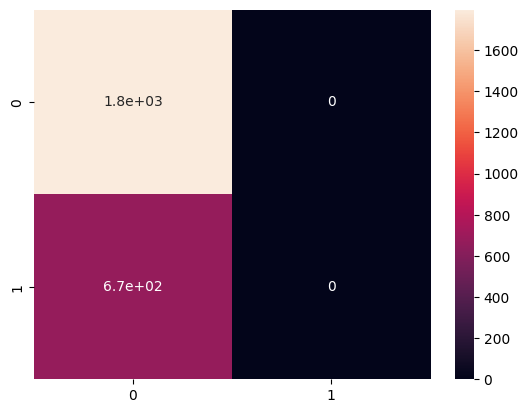

In [107]:
# heatmap
sns.heatmap(cm,annot=True)
plt.show()

In [108]:
# multiple regression model
train=customer_churn[['tenure','MonthlyCharges']]
test=customer_churn['Churn']

In [109]:
# train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.2,random_state=42)

In [110]:
# logistic regression
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
Lr.fit(x_train,y_train)

LogisticRegression()

In [111]:
# predict
y_pred=Lr.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [112]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[944,  92],
       [193, 180]])

In [113]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7977288857345636

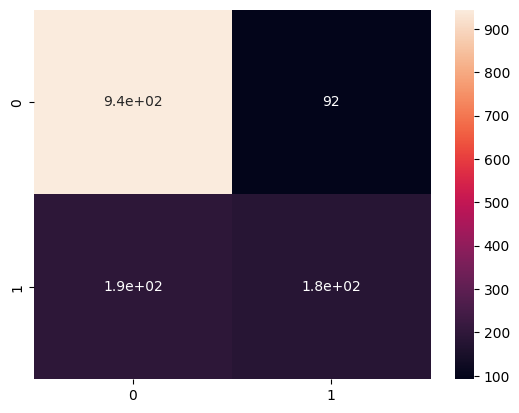

In [114]:
# heatmap
sns.heatmap(cm,annot=True)
plt.show()

# Decision Tree

In [115]:
train=customer_churn['tenure']
test=customer_churn['Churn']


In [116]:
# train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.2,random_state=42)

In [117]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train.values.reshape(-1,1),y_train)

DecisionTreeClassifier()

In [118]:
# predict
y_pred=dt.predict(x_test.values.reshape(-1,1))

In [119]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[951,  85],
       [257, 116]])

In [120]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7572746628814763

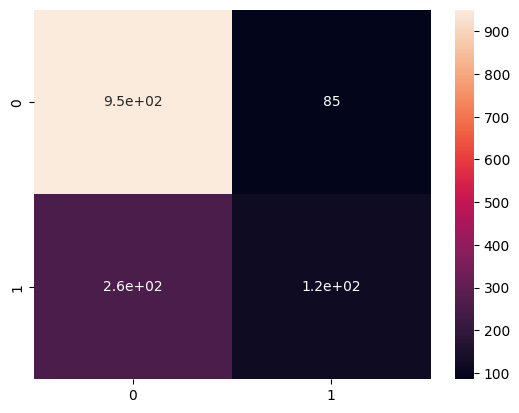

In [121]:
# heatmap
sns.heatmap(cm,annot=True)
plt.show()

# Random Forest

In [122]:
train=customer_churn[['tenure','MonthlyCharges']]
test=customer_churn['Churn']

In [124]:
# train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train,test,test_size=0.3,random_state=42)

In [125]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [126]:
# predict
y_pred=rf.predict(x_test)

In [127]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1326,  213],
       [ 305,  269]])

In [128]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.754850922858495

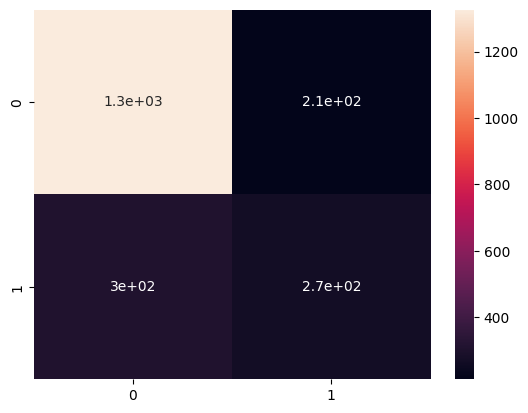

In [129]:
# heatmap
sns.heatmap(cm,annot=True)
plt.show()